<a href="https://colab.research.google.com/github/t6nand/mltasks/blob/master/non_linear_trig_func.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

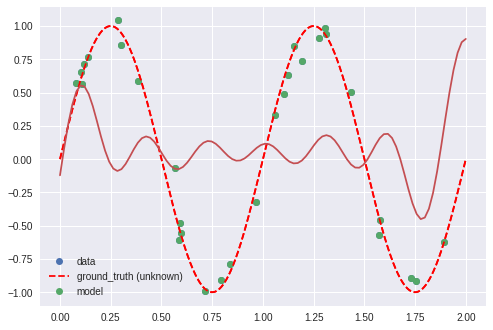

False


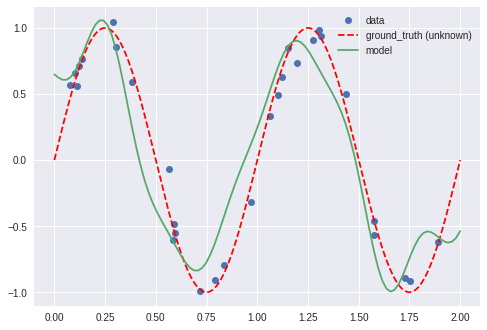

Cost:0.675430


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from dataset2_linreg import DataSet

#import data, plot data
y_D, x_D = DataSet.get_data()
DataSet.plot_data()
x_max = np.max(x_D)
learning_rate = 0.01

def extend_data(x, p = 1):
  x_ext = np.vstack([np.sin(2 * np.pi * (i) * (x/x_max)) for i in range(1,p+1)])
  x_ext = np.vstack((x, x_ext))
  return x_ext

def get_norm_params(x_data):
  mean_x = np.mean(x_data, axis=1).reshape((-1,1))
  stdd_x = np.std(x_data, axis=1).reshape((-1,1))
  return mean_x, stdd_x

P = 6
x_D_ext = extend_data(x_D, P)
x_D_ext_mean, x_D_ext_stdd = get_norm_params(x_D_ext)
w = np.array([0.1]*(P+2)).reshape(-1,1)

def l2_cost(x_arr, y_arr, predict_f):
    a = predict_f(x_arr)
    cost = 0.5 * np.sum((a - y_arr)**2)
    return cost
  
def predict_y(x):
  xe = extend_data(x, P)
  xe = (xe-x_D_ext_mean)/x_D_ext_stdd
  xe = np.vstack( (np.ones((1,xe.shape[1])), xe) )
  a = w.T.dot(xe)
  return a

DataSet.plot_model(predict_y)
plt.show()

x_train = extend_data(x_D,P) 
x_train = (x_train - x_D_ext_mean)/x_D_ext_stdd
x_train = np.vstack( (np.ones((1,x_train.shape[1])), x_train) )

for i in range(10000):
  a = predict_y(x_D)
  grad_w = x_train.dot( (a-y_D).T )
  w = w - (learning_rate * grad_w)

print(not np.any(grad_w))
DataSet.plot_model(predict_y)
plt.show()
print('Cost:%f' % l2_cost(x_D, y_D, predict_y))